In [85]:
import numpy as np
import os
import matplotlib.pyplot as plt
import jpegio
%matplotlib inline

In [110]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF75_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_75'

In [111]:
def calc_residual(stego, cover):
    residual_y =  np.abs(stego.coef_arrays[0].astype(np.int16) - cover.coef_arrays[0].astype(np.int16)).astype(np.uint8)
    return residual_y

In [112]:
def show_hist(cover_path: str, stego_path: str, count: int, multiple: int):

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:] == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_y= calc_residual(stego, cover) * multiple

        y_nnz_arr = []
        for j in range(256):
            y_nnz_arr.extend(list(filter(lambda a: a>0, residual_y[j])))

        count = {}
        for i in y_nnz_arr:
            try: count[i] += 1
            except: count[i] = 1

    plt.figure(figsize=(6, 6))
    print(count)
    plt.bar(count.keys(), count.values())
    plt.title('Plot of residual value count for Y-channel', fontsize=20)

    for key, value in count.items():
        plt.text(key - 0.35 , value + 0.5, str(value)[:5])

    plt.xticks([1, 2, 3, 4, 5], fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

{1: 5453}


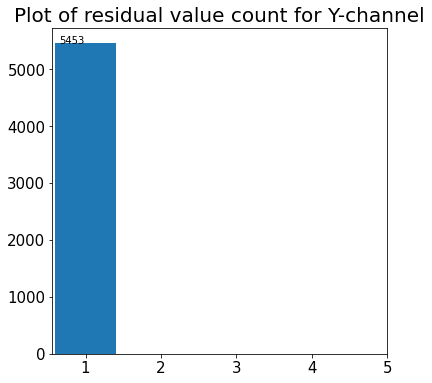

In [113]:
show_hist(cover_path, stego_path, 10, 1)